In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

import acquire as a 
import prepare as p
import explore as e

from scipy import stats

In [2]:
df = a.acquire_readmes()

In [3]:
df = p.prep_df_for_nlp(df,'readme_contents',extra_words=p.EXTRA_WORDS)

In [4]:
train, validate, test = p.split_data(df, 'language')

In [5]:
train

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
482,awesome-actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",p aligncenter br srcawesomeactionspng width150...,p aligncent br srcawesomeactionspng width150 b...,p aligncenter br srcawesomeactionspng width150...,sdras,34287
646,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",p aligncenter srchttpsiimgurcomsjzfzsljpg widt...,p aligncent srchttpsiimgurcomsjzfzsljpg width1...,p aligncenter srchttpsiimgurcomsjzfzsljpg widt...,InstaPy,2643
474,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery p aligncenter altosquery logo width200...,osqueri p aligncent altosqueri logo width200 s...,osquery p aligncenter altosquery logo width200...,osquery,4604
545,Best-App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app httpsappsappleco...,best app app bestapp io app httpsappsapplecomc...,best app apps bestapp io app httpsappsapplecom...,hzlzh,17437
539,actix-web,Other,actix-web/README.md,actixwebreadmemd,actixwebreadmemd,actixwebreadmemd,actix,16
...,...,...,...,...,...,...,...,...
47,sly,JavaScript,# [Sly](http://darsa.in/sly)\n\nJavaScript lib...,slyhttpdarsainsly javascript library onedirect...,slyhttpdarsainsli javascript librari onedirect...,slyhttpdarsainsly javascript library onedirect...,darsain,1512
268,free,Not Listed,更新时间 2023-01-12 00:00 \n所有免费节点都爬取自网络，请勿用于非法用途...,20230112 0000 android windows v2ray v2raynghtt...,20230112 0000 android window v2ray v2raynghttp...,20230112 0000 android window v2ray v2raynghttp...,freefq,13305
230,hello-algorithm,Java,## 简介\n\nEnglish version repo and Gitbook is o...,english repo gitbook english branchhttpsgithub...,english repo gitbook english branchhttpsgithub...,english repo gitbook english branchhttpsgithub...,geekxh,4652
304,jq,Other,README.md,readmemd,readmemd,readmemd,stedolan,8


In [6]:
train.username.value_counts()

microsoft           10
google               4
facebook             4
angular              3
facebookresearch     3
                    ..
mtdvio               1
FredrikNoren         1
openai               1
pcottle              1
stedolan             1
Name: username, Length: 413, dtype: int64

In [7]:
train[train.username == 'google'].language.value_counts()

Go            1
Java          1
Not Listed    1
Other         1
JavaScript    0
Python        0
TypeScript    0
Name: language, dtype: int64

## Does the length of the README indicate the main programming language?

In [8]:
pd.DataFrame(train.groupby('language').lemmatized_len.mean())

,lemmatized_len
language,
Go,8745.078947
Java,4953.918919
JavaScript,11525.223404
Not Listed,27658.682927
Other,8245.333333
Python,14422.543478
TypeScript,6401.800000


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='language', ylabel='lemmatized_len'>

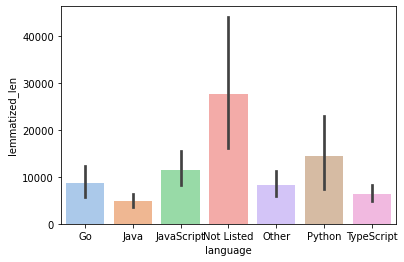

In [10]:
sns.barplot(x="language", y="lemmatized_len", data=train, palette='pastel')

In [98]:
go, java, javascript, not_listed, other, python, typescript = e.split_by_language(train)

In [12]:
stat, p = stats.kruskal(go.lemmatized_len, java.lemmatized_len, javascript.lemmatized_len, not_listed.lemmatized_len, other.lemmatized_len, python.lemmatized_len, typescript.lemmatized_len)

In [13]:
e.p_to_md(p)

## Because $\alpha$ > p,we  reject $H_0$

## Does the name of the programming language appearing in the README indicate the main programming language?

In [70]:
# Only 
js_js= train.language =='JavaScript'

In [71]:
all_js = train.lemmatized.str.contains('javascript')

In [72]:
ctab = pd.crosstab(js_js, all_js)

In [73]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [74]:
p

1.9672079000648653e-20

In [75]:
# Only 
python_python =train.language =='Python'

In [76]:
all_python = train.lemmatized.str.contains('python')

In [77]:
ctab = pd.crosstab(python_python, all_python)

In [78]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [79]:
p

9.234695818751059e-22

### Go NOT significant no need to encode

In [80]:
# Only 
gogo = train.language == 'Go'

In [81]:
all_go = train.lemmatized.str.contains('go')

In [82]:
ctab = pd.crosstab(gogo, all_go)

In [83]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [84]:
p

0.09683181374299626

In [85]:
# Only 
typescript_typescript = train.language == 'TypeScript'

In [86]:
all_typescript = train.lemmatized.str.contains('typescript')

In [87]:
ctab = pd.crosstab(typescript_typescript, all_typescript)

In [89]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [90]:
p

6.272210065337366e-07

In [109]:
javascript_words_freq = e.get_ngram_frequency(javascript.lemmatized)
python_words_freq = e.get_ngram_frequency(python.lemmatized)
typescript_words_freq = e.get_ngram_frequency(typescript.lemmatized)
go_words_freq = e.get_ngram_frequency(go.lemmatized)
other_series_freq = e.get_ngram_frequency(other.lemmatized)
not_listed_freq = e.get_ngram_frequency(not_listed.lemmatized)
java_words_freq = e.get_ngram_frequency(java.lemmatized)
all_words_freq = e.get_ngram_frequency(train.lemmatized)

In [161]:
word_counts = (pd.concat([all_words_freq, javascript_words_freq, python_words_freq,typescript_words_freq,go_words_freq,other_series_freq, java_words_freq, not_listed_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'typescript', 'go', 'java','other','not_listed'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,typescript,go,java,other,not_listed
0,558,132,169,5,67,112,6,67
00,91,1,30,0,0,60,0,0
000,21,6,2,0,4,9,0,0
0000,24,0,18,1,2,2,0,1
000000,2,1,0,0,0,1,0,0


In [162]:
word_counts_limited = word_counts[(word_counts.index=='javascript') | (word_counts.index=='python') | (word_counts.index=='typescript') | (word_counts.index=='go') | (word_counts.index=='java')]






In [163]:
word_counts_limited

,all,javascript,python,typescript,go,java,other,not_listed
go,484,45,29,12,218,101,17,62
java,250,4,17,0,7,87,81,54
javascript,810,627,15,42,6,50,2,68
python,694,17,451,2,10,124,6,84
typescript,171,39,2,61,2,27,1,39


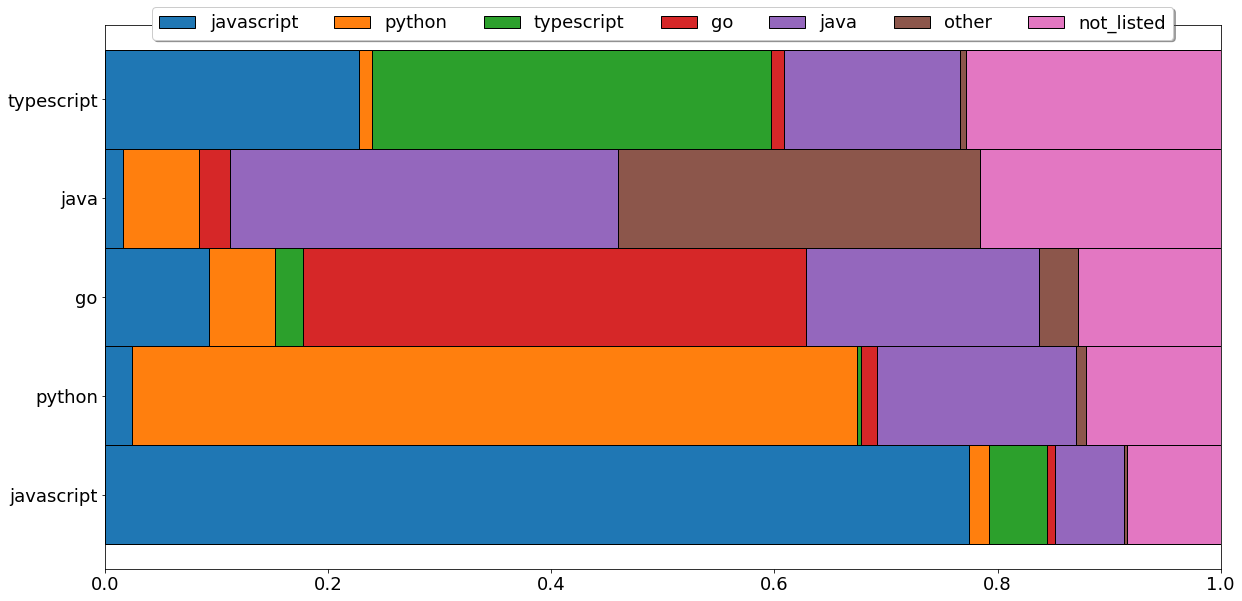

In [164]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.rcParams.update({'font.size': 18})

(word_counts_limited.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False, ax=ax)
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=7, fancybox=True, shadow=True)
ax.set_xlim(0,1)
plt.show()

KeyError: 'index'

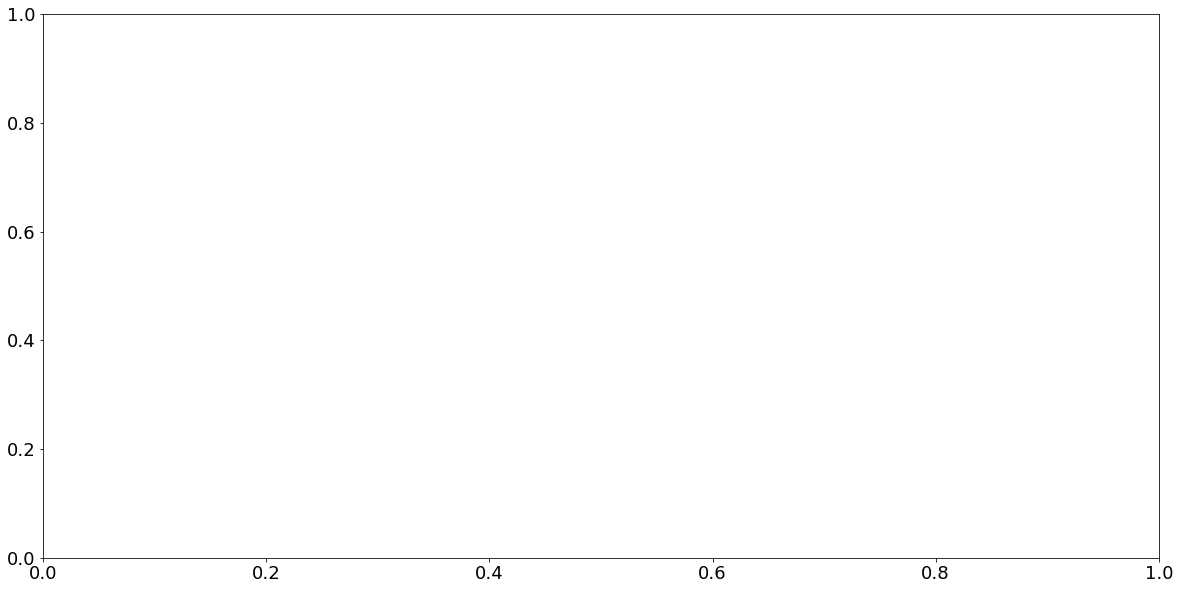

In [158]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.rcParams.update({'font.size': 18})

(word_counts_limited.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by='index')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False, ax=ax)
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=7, fancybox=True, shadow=True)
ax.set_xlim(0,1)

plt.show()